<a href="https://colab.research.google.com/github/hnhyhj/Python-and-CCC/blob/master/31_Complete_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chpater 31
# Complete Search

Complete search is a general method that can be used to solve almost any
algorithm problem. The idea is to generate all possible solutions to the problem
using brute force, and then select the best solution or count the number of
solutions, depending on the problem.

Complete search is a good technique if there is enough time to go through
all the solutions, because the search is usually easy to implement and it always
gives the correct answer. If complete search is too slow, other techniques, such as
greedy algorithms or dynamic programming, may be needed.

## 31.1 Generating subsets

We first consider the problem of generating all subsets of a set of n elements. For
example, the subsets of {0,1,2} are: {0}, {1}, {2}, {0,1}, {0,2}, {1,2} and {0,1,2}.
There are two common methods to generate subsets: we can either perform a
recursive search or exploit the bit representation of integers.

### Method 1

An elegant way to go through all subsets of a set is to use recursion. The
following function search generates the subsets of the set {0,1,...,n ¡ 1}. The
function maintains a vector subset that will contain the elements of each subset.
The search begins when the function is called with parameter 0.


```
void search(int k) {
  if (k == n) {
    // process subset
  } else {
      search(k+1);
      subset.push_back(k);
      search(k+1);
      subset.pop_back();
  }
}
```

When the function search is called with parameter k, it decides whether to
include the element k in the subset or not, and in both cases, then calls itself
with parameter k-1 However, if k=n, the function notices that all elements
have been processed and a subset has been generated.

The following tree illustrates the function calls when n=3. We can always
choose either the left branch (k is not included in the subset) or the right branch
(k is included in the subset).


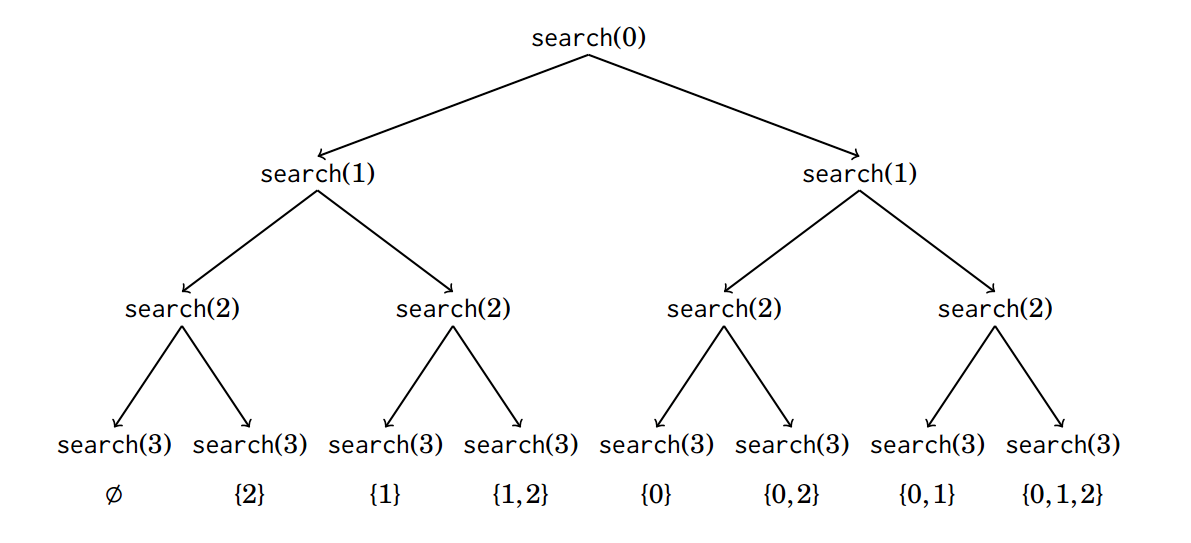

In [ ]:
"""
{4, 8, 9, 16, 25, 27, 32}
"""

"""Returns all subsets of size 0 - len(some_list) for some_list"""

a_list = [4, 8, 9, 16, 25, 27, 32]

def find_all_subset_1(some_list):

    if len(some_list) == 0:
        return [[]]

    subsets = []
    first_element = some_list[0]
    remaining_list = some_list[1:]
   
    # Strategy: get all the subsets of remaining_list. For each
    # of those subsets, a full subset list will contain both
    # the original subset as well as a version of the subset
    # that contains first_element
    for part_of_subsets in find_all_subset_1(remaining_list):
        subsets.append(part_of_subsets)
        subsets.append([first_element] + part_of_subsets[:])

    return subsets

all_subsets = find_all_subset_1(a_list)

print(f"There are {len(all_subsets)} subsets in total:")
for item in all_subsets:
    print(item)

### Method 2

Another way to generate subsets is based on the bit representation of integers.
Each subset of a set of n elements can be represented as a sequence of n bits,
which corresponds to an integer between 0...$2^n-1$. The ones in the bit sequence
indicate which elements are included in the subset.

The usual convention is that the last bit corresponds to element 0, the second
last bit corresponds to element 1, and so on. For example, the bit representation
of 25 is 11001, which corresponds to the subset {0,3,4}.

The following code goes through the subsets of a set of n elements:


```
for (int b = 0; b < (1<<n); b++) {
    // process subset
}
```

The following code shows how we can find the elements of a subset that
corresponds to a bit sequence. When processing each subset, the code builds a
vector that contains the elements in the subset.



```
for (int b = 0; b < (1<<n); b++) {
    vector<int> subset;
    for (int i = 0; i < n; i++) {
        if (b&(1<<i)) subset.push_back(i);
    }
}
```




In [ ]:
#############################################################
#################       Version 1             ###############
#############################################################

"""
{4, 8, 9, 16, 25, 27, 32}
"""

"""Returns all subsets of size 0 - len(some_list) for some_list"""

a_list = [4, 8, 9, 16, 25, 27, 32]

def find_all_subsets_2_1(some_list):
    length = len(some_list)
    for i in range(1 << length):
        print([some_list[j] for j in range(length) if (i & (1 << j))])

print(f"There are {1 << len(a_list)} subsets in total:")
find_all_subsets_2_1(a_list)

In [ ]:
#############################################################
#################       Version 2             ###############
#############################################################

"""
{4, 8, 9, 16, 25, 27, 32}
"""

"""Returns all subsets of size 0 - len(some_list) for some_list"""

a_list = [4, 8, 9, 16, 25, 27, 32]

def find_all_subsets_2_2(some_list):
    N = len(some_list)
    # enumerate the 2 ** N possible combinations
    for i in range(2 ** N):
        subsets = []
        for j in range(N):
            # test bit jth of integer i
            if (i >> j) % 2 == 1:
                subsets.append(some_list[j])
        yield subsets


all_subsets = list(find_all_subsets_2_2(a_list))

print(f"There are {len(all_subsets)} subsets in total:")
for item in all_subsets:
    print(item)

## 31.2 Generating permutations

Next we consider the problem of generating all permutations of a set of n elements.
For example, the permutations of {0,1,2} are (0,1,2), (0,2,1), (1,0,2), (1,2,0),
(2,0,1) and (2,1,0). Again, there are two approaches: we can either use recursion
or go through the permutations iteratively.

### 31.2.1 Method 1

Like subsets, permutations can be generated using recursion. The following
function search goes through the permutations of the set {0,1,...,n ¡ 1}. The
function builds a vector permutation that contains the permutation, and the
search begins when the function is called without parameters.


```
void search() {
  if (permutation.size() == n) {
    // process permutation
  } else {
    for (int i = 0; i < n; i++) {
      if (chosen[i]) continue;
      chosen[i] = true;
      permutation.push_back(i);
      search();
      chosen[i] = false;
      permutation.pop_back();
    }
  }
}
```

Each function call adds a new element to permutation. The array chosen
indicates which elements are already included in the permutation. If the size of
permutation equals the size of the set, a permutation has been generated.

In [ ]:
"""
{4, 8, 9, 16, 25, 27, 32}
"""

"""Returns all permutations of some_list"""

a_list = [4, 8, 9, 16, 25, 27, 32]


def find_all_permutations(some_list):

    if len(some_list) == 1:
        return [some_list]

    permutations = []
    first_element = some_list[0]
    remaining_list = some_list[1:]

    # Strategy: get all the permutations of remaining_list. For each
    # of those permutations, a full permutations list will be built
    # with insert the first_element in to all fo them

    for part_of_permutations in find_all_permutations(remaining_list):
        for i in range(len(part_of_permutations)+1):
            temp = part_of_permutations[:i] + \
                [first_element] + part_of_permutations[i:]
            permutations.append(temp)

    return permutations


all_permutations = find_all_permutations(a_list)

for item in all_permutations:
    print(item)
print(f"There are {len(all_permutations)} permutations in total:")

### Method 2

Another method for generating permutations is to begin with the permutation
{0,1,...,n ¡ 1} and repeatedly use a function that constructs the next permutation in increasing order. The C++ standard library contains the function
next_permutation that can be used for this:



```
vector<int> permutation;
for (int i = 0; i < n; i++) {
    permutation.push_back(i);
}
do {
// process permutation
} while (next_permutation(permutation.begin(),permutation.end()));
```



In [ ]:
#############################################################
############       itertools.permutation           ##########
#############################################################




## 31.3 Backtracking
A **backtracking** algorithm begins with an empty solution and extends the
solution step by step. The search recursively goes through all different ways how
a solution can be constructed.
As an example, consider the problem of calculating the number of ways n
queens can be placed on an $n*n$ chessboard so that no two queens attack each
other. For example, when $n=4$, there are two possible solutions:

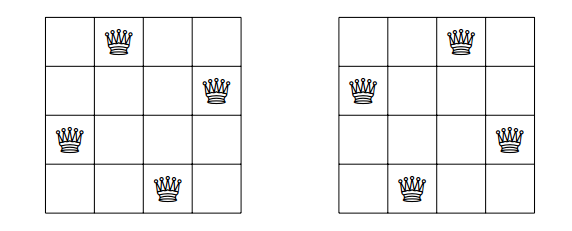

The problem can be solved using backtracking by placing queens to the board
row by row. More precisely, exactly one queen will be placed on each row so that
no queen attacks any of the queens placed before. A solution has been found
when all n queens have been placed on the board.

For example, when n=4, some partial solutions generated by the backtracking algorithm are as follows:

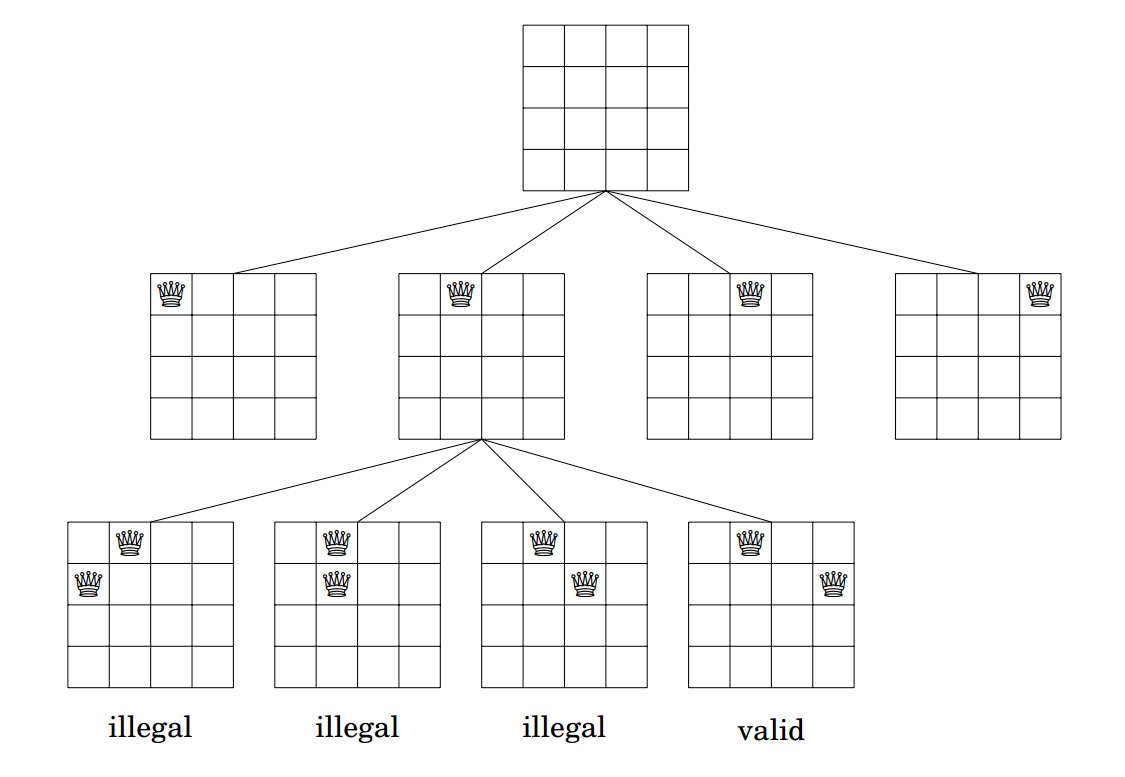

In [ ]:
"""
The problem is to place n queens on an n × n chessboard, 
so that no two queens are attacking each other.
"""

n = int(input())
pos = [0] * n
all_patterns = []

# row is the varaible to control which row is processing


def nqueens(p, row):
    # if all rows are legal then print this pattern
    if row == n:
        print(p)
    else:
        # outer loop to try every possible value(j) this row
        # j is from 1 to n corresponding the posittion on board
        for j in range(1, n+1):
            legal = True
            # inner loop to decide the value(j) is legal or not
            for i in range(row):
                if (p[i] == j) or (p[i] == j+(row-i)) or (p[i] == j-(row-i)):
                    legal = False

            if legal:
                p[row] = j
                nqueens(p, row+1)


nqueens(pos, 0)

## 34.4 Pruning the search

We can often optimize backtracking by pruning the search tree. The idea is to
add ”intelligence” to the algorithm so that it will notice as soon as possible if a
partial solution cannot be extended to a complete solution. Such optimizations
can have a tremendous effect on the efficiency of the search.

Let us consider the problem of calculating the number of paths in an n £ n
grid from the upper-left corner to the lower-right corner such that the path visits
each square exactly once. For example, in a $7*7$ grid, there are 111712 such
paths. One of the paths is as follows:

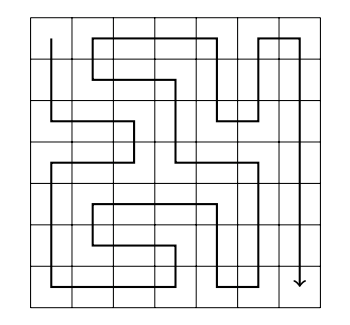

We focus on the $7*7$ case, because its level of difficulty is appropriate to
our needs. We begin with a straightforward backtracking algorithm, and then
optimize it step by step using observations of how the search can be pruned.
After each optimization, we measure the running time of the algorithm and the
number of recursive calls, so that we clearly see the effect of each optimization
on the efficiency of the search.

### Basic algorithm
The first version of the algorithm does not contain any optimizations. We simply
use backtracking to generate all possible paths from the upper-left corner to the
lower-right corner and count the number of such paths.
- running time: 483 seconds
- number of recursive calls: 76 billion

### Optimization 1
In any solution, we first move one step down or right. There are always two
paths that are symmetric about the diagonal of the grid after the first step. For
example, the following paths are symmetric:

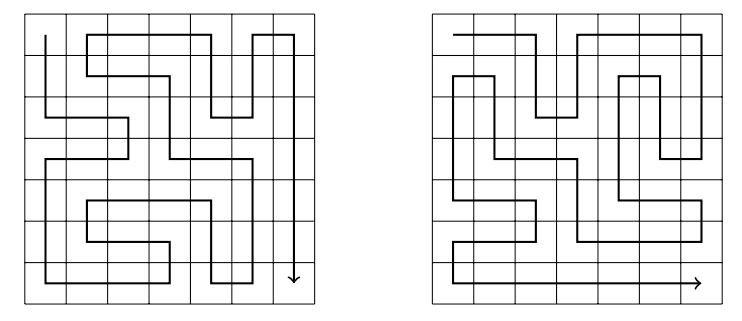

Hence, we can decide that we always first move one step down (or right), and
finally multiply the number of solutions by two.
- running time: 244 seconds
- number of recursive calls: 38 billion

### Optimization 2
If the path reaches the lower-right square before it has visited all other squares
of the grid, it is clear that it will not be possible to complete the solution. An
example of this is the following path:

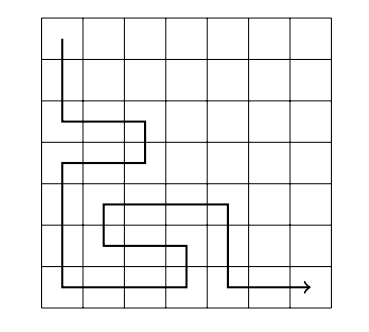

Using this observation, we can terminate the search immediately if we reach the
lower-right square too early.
- running time: 119 seconds
- number of recursive calls: 20 billion

### Optimization 3
If the path touches a wall and can turn either left or right, the grid splits into
two parts that contain unvisited squares. For example, in the following situation,
the path can turn either left or right:

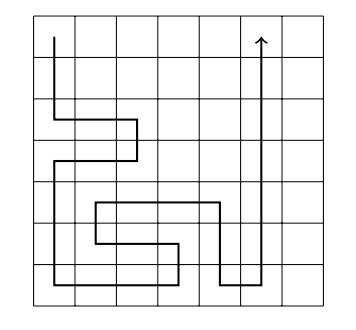

In this case, we cannot visit all squares anymore, so we can terminate the search.
This optimization is very useful:
- running time: 1.8 seconds
- number of recursive calls: 221 million

### Optimization 4
The idea of Optimization 3 can be generalized: if the path cannot continue
forward but can turn either left or right, the grid splits into two parts that both
contain unvisited squares. For example, consider the following path:

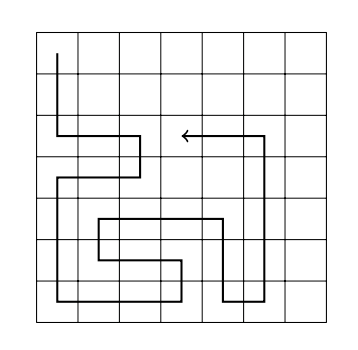

It is clear that we cannot visit all squares anymore, so we can terminate the
search. After this optimization, the search is very efficient:
- running time: 0.6 seconds
- number of recursive calls: 69 million

Now is a good moment to stop optimizing the algorithm and see what we have
achieved. The running time of the original algorithm was 483 seconds, and now
after the optimizations, the running time is only 0.6 seconds. Thus, the algorithm
became nearly 1000 times faster after the optimizations.

This is a usual phenomenon in backtracking, because the search tree is usually
large and even simple observations can effectively prune the search. Especially
useful are optimizations that occur during the first steps of the algorithm, i.e., at
the top of the search tree.

In [ ]:
#######################################################################

## 34.5 Meet in the middle

Meet in the middle is a technique where the search space is divided into two
parts of about equal size. A separate search is performed for both of the parts,
and finally the results of the searches are combined.

The technique can be used if there is an efficient way to combine the results
of the searches. In such a situation, the two searches may require less time than
one large search. Typically, we can turn a factor of $2^n$ into a factor of $2^{n/2}$ using
the meet in the middle technique.

As an example, consider a problem where we are given a list of n numbers
and a number x, and we want to find out if it is possible to choose some numbers
from the list so that their sum is x. For example, given the list $[2, 4, 5, 9]$ and
$x=15$, we can choose the numbers $[2, 4, 9]$ to get $2+4+9=15$. However, if $x=10$ for the same list, it is not possible to form the sum.

A simple algorithm to the problem is to go through all subsets of the elements
and check if the sum of any of the subsets is $x$. The running time of such an
algorithm is $O(2^n)$, because there are $2^n$ subsets. However, using the meet in the
middle technique, we can achieve a more efficient $O(2^{n/2})$ time algorithm2. Note
that $O(2n)$ and $O(2^{n/2})$ are different complexities because $O(2^{n/2})$ equals $\sqrt{2^n}$.

The idea is to divide the list into two lists $A$ and $B$ such that both lists contain
about half of the numbers. The first search generates all subsets of $A$ and stores
their sums to a list $S_A$. Correspondingly, the second search creates a list $S_B$ from $B$. After this, it suffices to check if it is possible to choose one element from $S_A$ and another element from $S_B$ such that their sum is $x$. This is possible exactly
when there is a way to form the sum $x$ using the numbers of the original list.

For example, suppose that the list is $[2,4,5,9]$ and $x=15$. First, we divide
the list into $A=[2,4]$ and $B=[5,9]$. After this, we create lists $S_{A}=[0,2,4,6]$ and $S_{B}=[0,5,9,14]$. In this case, the sum $x=15$ is possible to form, because $S_A$ contains the sum $6$, $S_B$ contains the sum $9$, and $6+9=15$. This corresponds to the solution $[2,4,9]$.

We can implement the algorithm so that its time complexity is $O(2^{n/2})$. First,
we generate sorted lists $S_A$ and $S_B$, which can be done in $O(2^{n/2})$ time using a
merge-like technique. After this, since the lists are sorted, we can check in $O(2^{n/2})$ time if the sum $x$ can be created from $S_A$ and $S_B$.